In [2]:
import os
import pandas as pd
import numpy as np
import pickle
# import pefile
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression

## PE Headers

For the PE Headers extraction from the PE files(like exe, dll files) refer ***PE_Header(exe, dll files)/PE-Header.ipynb*** file

In [3]:
# Load the extracted PE Heaaders csv file from the PE files dataset.
pe_df = pd.read_csv(r".\PE_Header(exe, dll files)\final_pe_data.csv")
pe_df

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1
3,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1
4,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,212992,4194304.0,4096,512,5,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,45056,4194304.0,4096,512,1,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,122880,4194304.0,4096,512,5,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,53248,4194304.0,4096,512,1,0


In [4]:
# lets check class balancedness for the 'legitimate' 
pe_df['legitimate'].value_counts()

0    96724
1    41323
Name: legitimate, dtype: int64

In [5]:
# From above csv file, load the part of the dataframe so that it is class balanced.
# This way class bias can be managed, reduced with a balanced dataset. 
final_pe_df=pe_df[:20003].append(pe_df[116047:], ignore_index = True)
final_pe_df.reset_index(drop = True, inplace = True )
final_pe_df

C:\Users\dasar\AppData\Local\Temp\ipykernel_47936\3118573282.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_pe_df=pe_df[:20003].append(pe_df[116047:], ignore_index = True)


,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1
3,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1
4,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41998,332,224,258,11,0,205824,223744,0,123291,4096,212992,4194304.0,4096,512,5,0
41999,332,224,33167,2,25,37888,185344,0,40000,4096,45056,4194304.0,4096,512,1,0
42000,332,224,258,10,0,118272,380416,0,59610,4096,122880,4194304.0,4096,512,5,0
42001,332,224,33166,2,25,49152,16896,0,51216,4096,53248,4194304.0,4096,512,1,0


In [6]:
# check the value counts for all the labels of the 'legitimate' 
final_pe_df['legitimate'].value_counts()

0    22000
1    20003
Name: legitimate, dtype: int64

## N-Grams 
N-grams are extracted from byte files and asm files. All the extracted features from both file types are merged into a single csv file.
  
For N-Grams CSV file, all the features extracted are (opcodes are for asm files and bytes for bytes files)
1. Byte unigrams
2. Opcode unigrams
3. Top 300 Byte bigrams
4. Top 200 Opcode bigrams
5. Top 200 Opcode trigrams
6. Top 200 Opcode tetragrams
7. Top 200 Image Pixels 

In [7]:
# Load the Final N-Grams csv file created
final_ngrams_df = pd.read_csv(r".\Ngrams(byte, asm files)\final_data.csv").drop("Unnamed: 0",axis=1)
final_ngrams_df

,0,1,2,3,4,5,6,7,8,9,...,pix190,pix191,pix192,pix193,pix194,pix195,pix196,pix197,pix198,pix199
0,601905,3905,2816,3832,3345,3242,3650,3201,2965,3205,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
1,39755,8337,7249,7186,8663,6844,8420,7589,9291,358,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
2,93506,9542,2568,2438,8925,9330,9007,2342,9107,2457,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
3,21091,1213,726,817,1257,625,550,523,1078,473,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
4,19764,710,302,433,559,410,262,249,422,223,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10736,5591,3305,3299,3303,3373,3368,3338,3253,3236,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
996,32359,1144,709,988,903,549,490,511,701,744,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
997,10411,5534,3196,3277,3103,3287,3251,3265,3200,3291,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638
998,11304,5525,3272,3300,3243,3214,3236,3244,3172,3276,...,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638,0.031638


In [8]:
# Rename the column name 'Malware' to 'legitimate' and its values accordingly
final_ngrams_df.rename(columns = {'Malware':'legitimate'}, inplace = True)
final_ngrams_df['legitimate'].replace({1:0,0:1}, inplace = True)

In [9]:
final_ngrams_df['legitimate']

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: legitimate, Length: 1000, dtype: int64

In [10]:
# Merge both the N-grams and PE headers dataframes 
final_merged_df = pd.concat([final_ngrams_df, final_pe_df], axis=0)

# Fill all the empty values with '0'
final_merged_df = final_merged_df.fillna(0)

In [11]:
final_merged_df.reset_index(drop = True, inplace = True)
final_merged_df

,0,1,2,3,4,5,6,7,8,9,...,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion
0,601905.0,3905.0,2816.0,3832.0,3345.0,3242.0,3650.0,3201.0,2965.0,3205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39755.0,8337.0,7249.0,7186.0,8663.0,6844.0,8420.0,7589.0,9291.0,358.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93506.0,9542.0,2568.0,2438.0,8925.0,9330.0,9007.0,2342.0,9107.0,2457.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21091.0,1213.0,726.0,817.0,1257.0,625.0,550.0,523.0,1078.0,473.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19764.0,710.0,302.0,433.0,559.0,410.0,262.0,249.0,422.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,205824.0,223744.0,0.0,123291.0,4096.0,212992.0,4194304.0,4096.0,512.0,5.0
42999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37888.0,185344.0,0.0,40000.0,4096.0,45056.0,4194304.0,4096.0,512.0,1.0
43000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,118272.0,380416.0,0.0,59610.0,4096.0,122880.0,4194304.0,4096.0,512.0,5.0
43001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49152.0,16896.0,0.0,51216.0,4096.0,53248.0,4194304.0,4096.0,512.0,1.0


In [12]:
# Save the dataframe into a csv file 
final_merged_df.to_csv(r'.\finalData_Merged.csv', index = False)

# Classification

In [13]:
from sklearn import preprocessing

# drop the 'legitimate' column (the column values to predict) and assign them to labels
X = final_merged_df.drop(['legitimate'],axis = 1).values
labels = final_merged_df['legitimate'].values

# Normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 3.32761640e+01,  1.25532536e+00,  2.68716310e-01, ...,
        -2.19844504e-01, -6.79794147e-01, -3.99111027e+00],
       [ 2.12922075e+00,  2.75112802e+00,  7.36141544e-01, ...,
        -2.19844504e-01, -6.79794147e-01, -3.99111027e+00],
       [ 5.10739267e+00,  3.15781624e+00,  2.42566646e-01, ...,
        -2.19844504e-01, -6.79794147e-01, -3.99111027e+00],
       [ 1.09510789e+00,  3.46773747e-01,  4.83421295e-02, ...,
        -2.19844504e-01, -6.79794147e-01, -3.99111027e+00],
       [ 1.02158304e+00,  1.77010946e-01,  3.63464037e-03, ...,
        -2.19844504e-01, -6.79794147e-01, -3.99111027e+00]])

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( final_merged_df, labels, test_size=0.3, random_state=4)

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50)
RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

# K Nearest Neighbor(KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc  = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh         = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    knn_yhat      = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)

    
    std_acc[n-1]=np.std(knn_yhat == y_test)/np.sqrt(knn_yhat.shape[0])
k = mean_acc.argmax()+1
print("Best k-value is: ",k)
KNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#knn_yhat  = KNN_model.predict(X_test)

Best k-value is:  1


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit( X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# SVM

In [18]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train)

SVC()

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model= GradientBoostingClassifier(n_estimators=50)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50)

# Model Evaluation Using Test Set

In [21]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [22]:
RF_yhat = RF_model.predict(X_test)
print("Random Forest Jaccard index: %.6f" % jaccard_score(y_test, RF_yhat))
print("Random Forest F1-score: %.6f" % f1_score(y_test, RF_yhat, average='weighted') )
print("Accuracy of Random Forest classifier is: %.6f", RF_model.score(X_test,y_test)) 

Random Forest Jaccard index: 0.999671
Random Forest F1-score: 0.999845
Accuracy of Random Forest classifier is: %.6f 0.999844973257887


In [23]:
knn_yhat = KNN_model.predict(X_test)
print("KNN Jaccard index: %.6f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.6f" % f1_score(y_test, knn_yhat, average='weighted') )
print("Accuracy of KNN classifier is: %.6f", KNN_model.score(X_test, y_test)) 

KNN Jaccard index: 0.955809
KNN F1-score: 0.978685
Accuracy of KNN classifier is: %.6f 0.9786838229594605


In [24]:
from sklearn.metrics import confusion_matrix
result= RF_model.predict(X_test)
conf_mat= confusion_matrix(y_test,result)
conf_mat

array([[6822,    2],
       [   0, 6077]], dtype=int64)

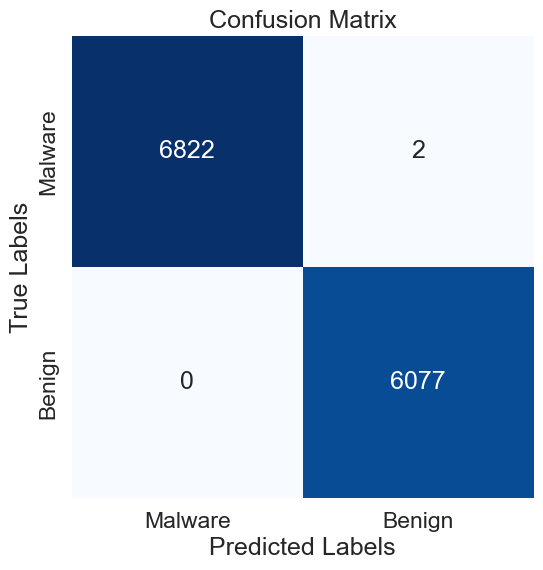

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.array(['Malware', 'Benign'])

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Gave the best results, 99.965120 Accuracy

In [26]:
'''
# Decision Tree
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.6f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.6f" % f1_score(y_test, DT_yhat, average='weighted') )
print("Accuracy of Decision Tree classifier is: %.6f", DT_model.score(X_test,y_test))

# Gradient Boosting
GB_yhat = GB_model.predict(X_test)
print("GB Jaccard index: %.6f" % jaccard_score(y_test, GB_yhat))
print("GB F1-score: %.6f" % f1_score(y_test, GB_yhat, average='weighted'))
print("Accuracy of Gradient Boosting classifier is %.6f:", GB_model.score(X_test,y_test))    

# SVM
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.6f" % jaccard_score(y_test, SVM_yhat))
print("SVM F1-score: %.6f" % f1_score(y_test, SVM_yhat, average='weighted'))
print("Accuracy of SVM classifier is: %.6f", SVM_model.score(X_test,y_test))  

# Logistic Regression
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.6f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.6f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.6f" % log_loss(y_test, LR_yhat_prob))
print("Accuracy of Logistic Regression classifier is: %.6f", LR_model.score(X_test,y_test)) 
'''

DT Jaccard index: 1.000000
DT F1-score: 1.000000
Accuracy of Decision Tree classifier is: %.6f 1.0
SVM Jaccard index: 0.000000
SVM F1-score: 0.365989
Accuracy of SVM classifier is: %.6f 0.5289512440896055
GB Jaccard index: 1.000000
GB F1-score: 1.000000
Accuracy of Gradient Boosting classifier is %.6f: 1.0
LR Jaccard index: 0.482761
LR F1-score: 0.353126
LR LogLoss: 0.611195
Accuracy of Logistic Regression classifier is: %.6f 0.4953104410510813


In [33]:
# SVM
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.6f" % jaccard_score(y_test, SVM_yhat))
print("SVM F1-score: %.6f" % f1_score(y_test, SVM_yhat, average='weighted'))
print("Accuracy of SVM classifier is: %.6f", SVM_model.score(X_test,y_test))  

# Logistic Regression
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.6f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.6f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.6f" % log_loss(y_test, LR_yhat_prob))
print("Accuracy of Logistic Regression classifier is: %.6f", LR_model.score(X_test,y_test)) 

SVM Jaccard index: 0.000000
SVM F1-score: 0.365989
Accuracy of SVM classifier is: %.6f 0.5289512440896055
LR Jaccard index: 0.482761
LR F1-score: 0.353126
LR LogLoss: 0.611195
Accuracy of Logistic Regression classifier is: %.6f 0.4953104410510813


In [32]:
import joblib
joblib.dump(RF_model, 'RF_model.pkl')
joblib.dump(KNN_model, 'KNN_model.pkl')
joblib.dump(LR_model, 'LR_model.pkl')
joblib.dump(SVM_model, 'SVM_model.pkl')

In [ ]:
def evaluationMetrics(model, modelName):
    yhat = model.predict(X_test)
    print(f"Evaluation Metrics For {modelName}: ")
    print("Jaccard index: %.6f" % jaccard_score(y_test, yhat))
    print("F1-score: %.6f" % f1_score(y_test, yhat, average='weighted'))
    print("Accuracy: %.6f\n", SVM_model.score(X_test,y_test))

import joblib
def saveModel(model, modelName):
    joblib.dump(model, f'{modelName}.pkl')